In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
mp_national = pd.read_csv("nmdb-mortgage-performance-statistics-national-census-areas-quarterly/nmdb-mortgage-performance-statistics-national-census-areas-quarterly.csv")
mp_national

,SOURCE,FREQUENCY,SERIESID,GEOLEVEL,GEOID,GEONAME,MARKET,PERIOD,YEAR,QUARTER,MONTH,SUPPRESSED,VALUE1
0,NMDB,Quarterly,PD3060,National,USA,United States,All Mortgages,2002Q1,2002,1,3,0,2.3
1,NMDB,Quarterly,PD3060,National,USA,United States,All Mortgages,2002Q2,2002,2,6,0,2.4
2,NMDB,Quarterly,PD3060,National,USA,United States,All Mortgages,2002Q3,2002,3,9,0,2.6
3,NMDB,Quarterly,PD3060,National,USA,United States,All Mortgages,2002Q4,2002,4,12,0,2.7
4,NMDB,Quarterly,PD3060,National,USA,United States,All Mortgages,2003Q1,2003,1,3,0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,NMDB,Quarterly,FBR,Census Division,DPAC,Pacific,Other Conventional Market,2022Q2,2022,2,6,0,0.3
15284,NMDB,Quarterly,FBR,Census Division,DPAC,Pacific,Other Conventional Market,2022Q3,2022,3,9,0,0.2
15285,NMDB,Quarterly,FBR,Census Division,DPAC,Pacific,Other Conventional Market,2022Q4,2022,4,12,0,0.2
15286,NMDB,Quarterly,FBR,Census Division,DPAC,Pacific,Other Conventional Market,2023Q1,2023,1,3,0,0.7


In [3]:
# Extract relevant columns and filter data for YEAR
#s 2006-2010
merged_national = mp_national.loc[(mp_national['YEAR'] >= 2006) & (mp_national['YEAR'] <= 2022), ['YEAR', 'SERIESID', 'MONTH', 'VALUE1']]

# Convert 'YEAR
#' and 'MONTH' to integers
merged_national['YEAR'] = merged_national['YEAR'].astype(int)
merged_national['MONTH'] = merged_national['MONTH'].astype(int)

# Combine 'YEAR
#' and 'MONTH' columns to create a 'DATE
#' column
merged_national['DATE'] = merged_national['YEAR'].astype(str) + '-' + merged_national['MONTH'].astype(str)

# Convert 'DATE
#' to datetime format
merged_national['DATE'] = pd.to_datetime(merged_national['DATE'], format='%Y-%m')
merged_national


,YEAR,SERIESID,MONTH,VALUE1,DATE
16,2006,PD3060,3,2.1,2006-03-01
17,2006,PD3060,6,2.4,2006-06-01
18,2006,PD3060,9,2.6,2006-09-01
19,2006,PD3060,12,2.8,2006-12-01
20,2007,PD3060,3,2.5,2007-03-01
...,...,...,...,...,...
15281,2021,FBR,12,0.5,2021-12-01
15282,2022,FBR,3,0.3,2022-03-01
15283,2022,FBR,6,0.3,2022-06-01
15284,2022,FBR,9,0.2,2022-09-01


In [4]:
#Create different DF's for different datasets
PD3060_ntl = merged_national.loc[(merged_national['SERIESID'] == 'PD3060'),['YEAR', 'SERIESID', 'MONTH', 'VALUE1', 'DATE']]
PD90180_ntl = merged_national.loc[(merged_national['SERIESID'] == 'PD90180'),['YEAR', 'SERIESID', 'MONTH', 'VALUE1', 'DATE']]
FBD_ntl = merged_national.loc[(merged_national['SERIESID'] == 'FBD'),['YEAR', 'SERIESID', 'MONTH', 'VALUE1', 'DATE']]


In [5]:

PD3060_ntl['DATE'] = pd.to_datetime(PD3060_ntl['DATE'], format='%Y-%m')
PD90180_ntl['DATE'] = pd.to_datetime(PD90180_ntl['DATE'], format='%Y-%m')
FBD_ntl['DATE'] = pd.to_datetime(FBD_ntl['DATE'], format='%Y-%m')

In [6]:
#Take mean for each individual dataset
overall_df = merged_national.groupby('DATE')['VALUE1'].mean()
PD3060_ntl = PD3060_ntl.groupby('DATE')['VALUE1'].mean()
PD90180_ntl = PD90180_ntl.groupby('DATE')['VALUE1'].mean()
FBD_ntl = FBD_ntl.groupby('DATE')['VALUE1'].mean()


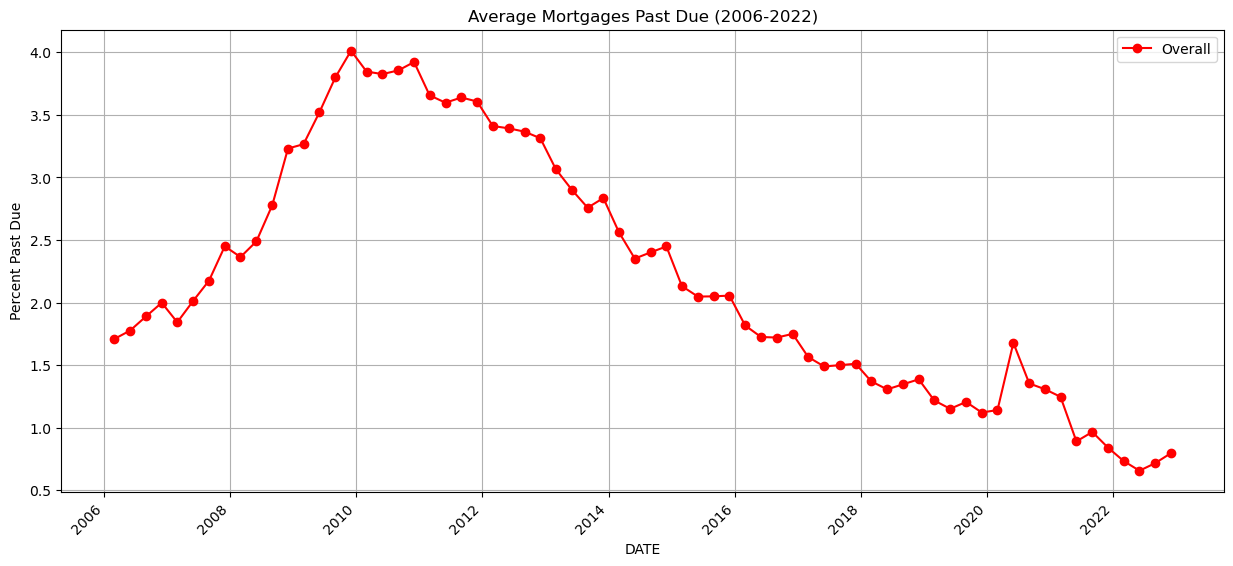

In [7]:
# Plotting
plt.figure(1, figsize=(15, 6))

# Plotting overall mortgage performance
plt.plot(overall_df, label="Overall", color='r', marker='o')

# Labels and title
plt.xlabel("DATE")
plt.ylabel("Percent Past Due")
plt.title("Average Mortgages Past Due (2006-2022)")
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("Figures/Overall_Performance.png")

# Show the plot
plt.show()

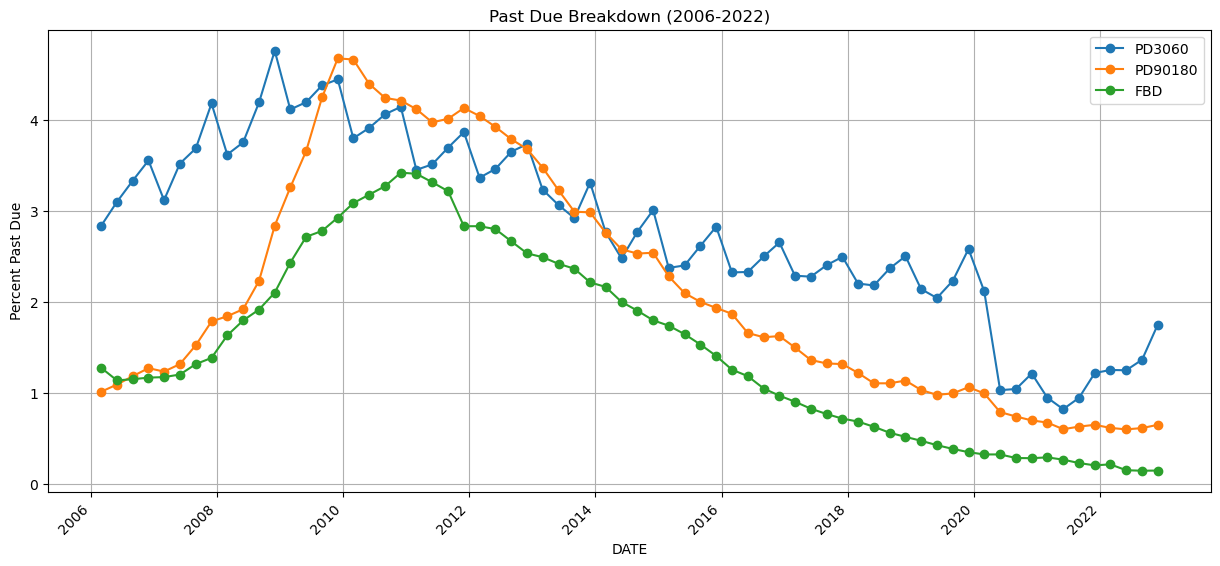

In [8]:
# Plotting
plt.figure(2, figsize=(15, 6))

# Plotting mortgage performance breakdown
plt.plot(PD3060_ntl, label="PD3060", marker='o')
plt.plot(PD90180_ntl, label="PD90180", marker='o')
plt.plot(FBD_ntl, label="FBD", marker='o')

# Labels and title
plt.xlabel("DATE")
plt.ylabel("Percent Past Due")
plt.title("Past Due Breakdown (2006-2022)")
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("Figures/Past_Due_Breakdown.png")

# Show the plot
plt.show()